# Today's agenda

1. A bit more about indexes
2. `value_counts`
3. Strings in Pandas and the `str` proxy object
4. Plotting in Pandas
5. DataFrames — creating them, editing them, selecting from them
6. Reading from and writing to files (especially CSV)
7. Plotting data frames
8. Special kinds of plots — scatter plots — on data frames

In [1]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = Series([10, 20, 30, 40, 50])
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [3]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [4]:
s.index = [100, 200, 300, 400, 500]
s

100    10
200    20
300    30
400    40
500    50
dtype: int64

In [5]:
s.index

Int64Index([100, 200, 300, 400, 500], dtype='int64')

In [6]:
s.index.values

array([100, 200, 300, 400, 500])

In [7]:
s.index = list('abcde')
s

a    10
b    20
c    30
d    40
e    50
dtype: int64

In [8]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [9]:
s.index = pd.RangeIndex(100, 110, 2)

In [10]:
s

100    10
102    20
104    30
106    40
108    50
dtype: int64

In [11]:
s.index

RangeIndex(start=100, stop=110, step=2)

In [12]:
s.loc[104] # use 104 as the index to look up a value

30

In [13]:
s.iloc[4]  # count from the start, to the 4th (starting with 0) item

50

In [14]:
# value_counts

s = Series([10, 20, 30, 20, 30, 40, 30, 40, 40, 40, 50, 60, 70, 50, 70,90])
s

0     10
1     20
2     30
3     20
4     30
5     40
6     30
7     40
8     40
9     40
10    50
11    60
12    70
13    50
14    70
15    90
dtype: int64

In [15]:
s.value_counts()

40    4
30    3
70    2
20    2
50    2
60    1
10    1
90    1
dtype: int64

In [16]:
# what are the three most common values in s?

s.value_counts().head(3)

40    4
30    3
70    2
dtype: int64

In [18]:
s.value_counts().head(3).index.values

array([40, 30, 70])

In [20]:
s.value_counts()

40    4
30    3
70    2
20    2
50    2
60    1
10    1
90    1
dtype: int64

In [23]:
s.value_counts(normalize=True)

40    0.2500
30    0.1875
70    0.1250
20    0.1250
50    0.1250
60    0.0625
10    0.0625
90    0.0625
dtype: float64

In [24]:
s = Series([10, 20, 30, 40, 50, 60, 70])
s

0    10
1    20
2    30
3    40
4    50
5    60
6    70
dtype: int64

In [25]:
s = Series([10, 20, 30, 40, 50, 60, 70], dtype=np.int16)
s

0    10
1    20
2    30
3    40
4    50
5    60
6    70
dtype: int16

In [26]:
s = Series([10, 20, 30, 40.2, 50, 60, 70])
s

0    10.0
1    20.0
2    30.0
3    40.2
4    50.0
5    60.0
6    70.0
dtype: float64

In [27]:
a = np.array('this is a very interesting demo'.split())
a

array(['this', 'is', 'a', 'very', 'interesting', 'demo'], dtype='<U11')

In [28]:
s = Series('this is a very interesting demo'.split())
s


0           this
1             is
2              a
3           very
4    interesting
5           demo
dtype: object

In [29]:
len(s)

6

In [30]:
for one_item in s:
    print(f'{one_item}: {len(one_item)}')

this: 4
is: 2
a: 1
very: 4
interesting: 11
demo: 4


In [31]:
# the .str proxy on a series lets us apply a string method to every string in the series

s.str

In [32]:
s.str.len()

0     4
1     2
2     1
3     4
4    11
5     4
dtype: int64

In [33]:
s = Series('10 20 30 abcd 50 60 70'.split())
s

0      10
1      20
2      30
3    abcd
4      50
5      60
6      70
dtype: object

In [34]:
s.astype(np.int64)

ValueError: invalid literal for int() with base 10: 'abcd'

In [35]:
# I want to get the mean of the numbers in series s
s

0      10
1      20
2      30
3    abcd
4      50
5      60
6      70
dtype: object

In [36]:
s.sum()

'102030abcd506070'

In [37]:
s.str.isdigit()

0     True
1     True
2     True
3    False
4     True
5     True
6     True
dtype: bool

In [38]:
s[s.str.isdigit()]

0    10
1    20
2    30
4    50
5    60
6    70
dtype: object

In [39]:
s[s.str.isdigit()].astype(np.int64)

0    10
1    20
2    30
4    50
5    60
6    70
dtype: int64

# Exercises: Pandas and strings

1. Create a series containing 10 words of varying lengths.
2. Find the words whose length is odd.
3. Find the words whose length is shorter than the mean.
4. Find the words (if any) that contain both 'a' and 'e'.  (Hint: Use the "contains" method)

In [40]:
s = Series('this is a fantastic demonstration of a few interesting words'.split())
s

0             this
1               is
2                a
3        fantastic
4    demonstration
5               of
6                a
7              few
8      interesting
9            words
dtype: object

In [44]:
s[s.str.len() % 2 == 1]

2                a
3        fantastic
4    demonstration
6                a
7              few
8      interesting
9            words
dtype: object

In [47]:
s[s.str.len() < s.str.len().mean()]

0     this
1       is
2        a
5       of
6        a
7      few
9    words
dtype: object

In [50]:
s[s.str.contains('a')  & s.str.contains('e')]

4    demonstration
dtype: object

In [51]:
# regular expressions

# https://RegexpCrashCourse.com/  

In [53]:
s[s.str.contains('a.*e|e.*a')]

4    demonstration
dtype: object

In [54]:
help(s.str.contains)

Help on method contains in module pandas.core.strings:

contains(pat, case=True, flags=0, na=nan, regex=True) method of pandas.core.strings.StringMethods instance
    Test if pattern or regex is contained within a string of a Series or Index.
    
    Return boolean Series or Index based on whether a given pattern or regex is
    contained within a string of a Series or Index.
    
    Parameters
    ----------
    pat : str
        Character sequence or regular expression.
    case : bool, default True
        If True, case sensitive.
    flags : int, default 0 (no flags)
        Flags to pass through to the re module, e.g. re.IGNORECASE.
    na : default NaN
        Fill value for missing values.
    regex : bool, default True
        If True, assumes the pat is a regular expression.
    
        If False, treats the pat as a literal string.
    
    Returns
    -------
    Series or Index of boolean values
        A Series or Index of boolean values indicating whether the
        gi

In [55]:
s = Series([10, 20, 30, 20, 30, 40, 50, 30, 10])

s

0    10
1    20
2    30
3    20
4    30
5    40
6    50
7    30
8    10
dtype: int64

<AxesSubplot:>

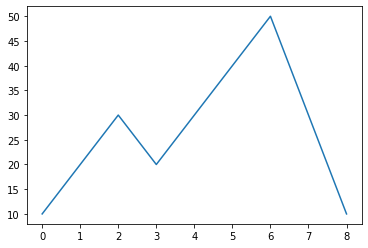

In [56]:
s.plot()  # line plot -- we could also say s.plot.line()

<AxesSubplot:>

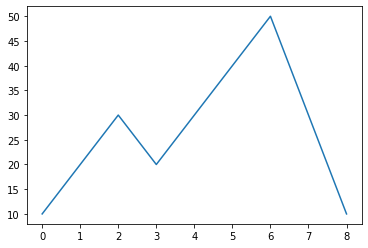

In [57]:
s.plot.line()

<AxesSubplot:>

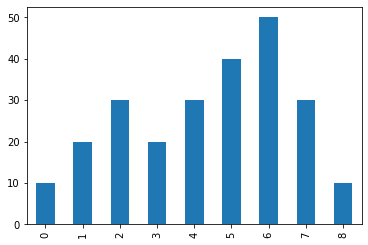

In [59]:
s.plot.bar()

In [60]:
s = Series(np.random.randint(0, 100, 1000))
s

0      36
1      64
2      48
3      99
4       7
       ..
995     9
996    95
997    13
998    72
999    21
Length: 1000, dtype: int64

<AxesSubplot:>

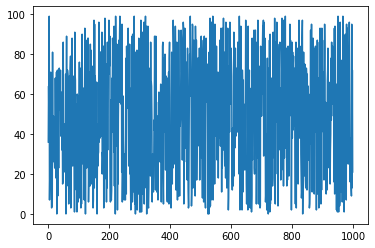

In [61]:
s.plot.line()

<AxesSubplot:>

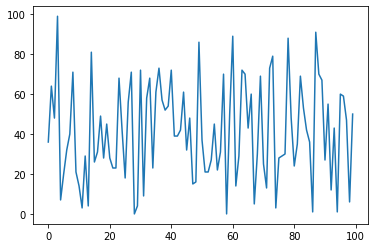

In [62]:
s[:100].plot.line()

In [63]:
s.value_counts()

86    17
73    17
81    16
3     16
5     16
      ..
24     5
85     5
26     4
16     3
62     2
Length: 100, dtype: int64

<AxesSubplot:ylabel='Frequency'>

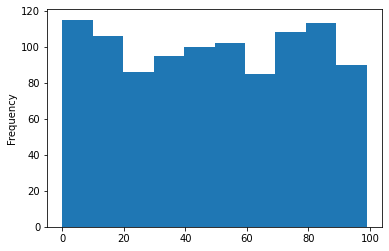

In [64]:
# histogram -- shows us how often each value appeared

s.plot.hist()

<AxesSubplot:>

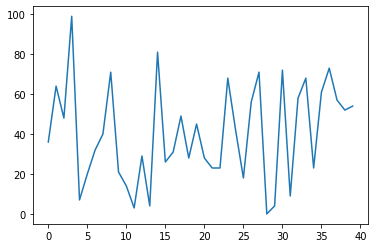

In [66]:
s = s[:40]
s.plot.line()

<AxesSubplot:title={'center':'My Amazing Plot'}>

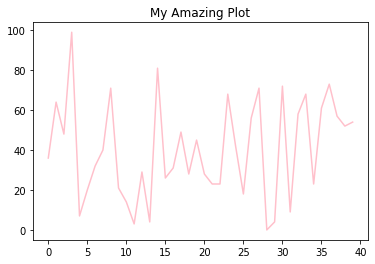

In [68]:
s.plot.line(color='pink', title='My Amazing Plot')

In [69]:
help(s.plot.line)

Help on method line in module pandas.plotting._core:

line(x=None, y=None, **kwargs) method of pandas.plotting._core.PlotAccessor instance
    Plot Series or DataFrame as lines.
    
    This function is useful to plot lines using DataFrame's values
    as coordinates.
    
    Parameters
    ----------
    x : label or position, optional
        Allows plotting of one column versus another. If not specified,
        the index of the DataFrame is used.
    y : label or position, optional
        Allows plotting of one column versus another. If not specified,
        all numerical columns are used.
    color : str, array_like, or dict, optional
        The color for each of the DataFrame's columns. Possible values are:
    
        - A single color string referred to by name, RGB or RGBA code,
            for instance 'red' or '#a98d19'.
    
        - A sequence of color strings referred to by name, RGB or RGBA
            code, which will be used for each column recursively. For
     

In [70]:
help(DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pi

In [71]:
s.describe()

count    40.000000
mean     40.200000
std      24.976091
min       0.000000
25%      22.500000
50%      38.000000
75%      58.750000
max      99.000000
dtype: float64

<AxesSubplot:>

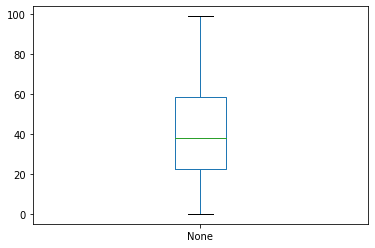

In [72]:
# descriptive statistics -- John Tewkey

# box plot -- visual version of the descriptive statistics

s.plot.box()

In [76]:
s.loc[0] = 600
s.loc[1] = 500
s.loc[2] = 400
s.loc[3] = 300


<AxesSubplot:>

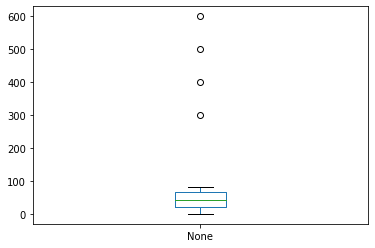

In [77]:
s.plot.box()

In [79]:
s.mean() + 2*s.std()

343.44016985846724

In [80]:
help(s.plot.box)

Help on method box in module pandas.plotting._core:

box(by=None, **kwargs) method of pandas.plotting._core.PlotAccessor instance
    Make a box plot of the DataFrame columns.
    
    A box plot is a method for graphically depicting groups of numerical
    data through their quartiles.
    The box extends from the Q1 to Q3 quartile values of the data,
    with a line at the median (Q2). The whiskers extend from the edges
    of box to show the range of the data. The position of the whiskers
    is set by default to 1.5*IQR (IQR = Q3 - Q1) from the edges of the
    box. Outlier points are those past the end of the whiskers.
    
    For further details see Wikipedia's
    entry for `boxplot <https://en.wikipedia.org/wiki/Box_plot>`__.
    
    A consideration when using this chart is that the box and the whiskers
    can overlap, which is very common when plotting small sets of data.
    
    Parameters
    ----------
    by : str or sequence
        Column in the DataFrame to group by

<AxesSubplot:>

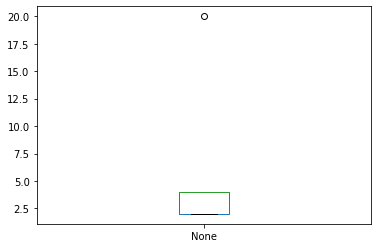

In [81]:
s = Series([2, 4, 2, 4, 2, 4, 20])
s.plot.box()

In [82]:
s.describe()

count     7.000000
mean      5.428571
std       6.502747
min       2.000000
25%       2.000000
50%       4.000000
75%       4.000000
max      20.000000
dtype: float64

In [83]:
s = 

0     2
1     4
2     2
3     4
4     2
5     4
6    20
dtype: int64

In [84]:
# value_counts

s = Series([10, 20, 30, 20, 30, 40, 30, 40, 40, 40, 50, 60, 70, 50, 70,90])
s

0     10
1     20
2     30
3     20
4     30
5     40
6     30
7     40
8     40
9     40
10    50
11    60
12    70
13    50
14    70
15    90
dtype: int64

In [85]:
s.value_counts()

40    4
30    3
70    2
20    2
50    2
60    1
10    1
90    1
dtype: int64

<AxesSubplot:ylabel='None'>

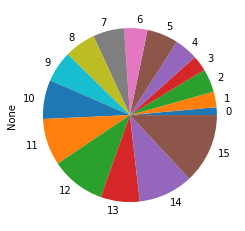

In [86]:
s.plot.pie()  # create a pie plot from our series

In [87]:
s

0     10
1     20
2     30
3     20
4     30
5     40
6     30
7     40
8     40
9     40
10    50
11    60
12    70
13    50
14    70
15    90
dtype: int64

In [88]:
s.sum()

690

<AxesSubplot:ylabel='None'>

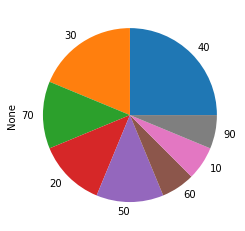

In [89]:
s.value_counts().plot.pie()

In [91]:
help(s.plot.pie)

Help on method pie in module pandas.plotting._core:

pie(**kwargs) method of pandas.plotting._core.PlotAccessor instance
    Generate a pie plot.
    
    A pie plot is a proportional representation of the numerical data in a
    column. This function wraps :meth:`matplotlib.pyplot.pie` for the
    specified column. If no column reference is passed and
    ``subplots=True`` a pie plot is drawn for each numerical column
    independently.
    
    Parameters
    ----------
    y : int or label, optional
        Label or position of the column to plot.
        If not provided, ``subplots=True`` argument must be passed.
    **kwargs
        Keyword arguments to pass on to :meth:`DataFrame.plot`.
    
    Returns
    -------
    matplotlib.axes.Axes or np.ndarray of them
        A NumPy array is returned when `subplots` is True.
    
    See Also
    --------
    Series.plot.pie : Generate a pie plot for a Series.
    DataFrame.plot : Make plots of a DataFrame.
    
    Examples
    ------

# Exercises: Plotting

1. Get the weather report for your city over the coming week, and create a series with those temperatures.  The index should contain the days' names.

2. Create a line plot with the temperatures.

3. Create a pie plot, showing how often each temperature is forecast in the coming week. 

4. Create a box plot with the temperatures.  What are the maximum, minimum, and mean temperatures?


In [92]:
s = Series([32, 31, 31, 31, 30, 31, 33, 32],
          index='Tue Wed Thu Fri Sat Sun Mon Tue'.split())
s



Tue    32
Wed    31
Thu    31
Fri    31
Sat    30
Sun    31
Mon    33
Tue    32
dtype: int64

In [93]:
s.loc['Tue']

Tue    32
Tue    32
dtype: int64

<AxesSubplot:>

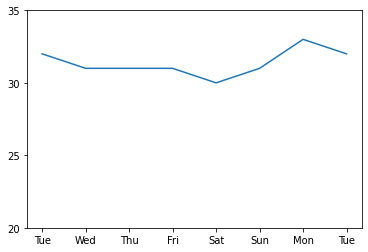

In [104]:
s.plot.line(yticks=list(range(20, 40, 5)))

In [96]:
help(DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pi

In [105]:
s.value_counts()

31    4
32    2
30    1
33    1
dtype: int64

<AxesSubplot:ylabel='None'>

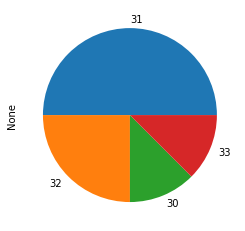

In [106]:
s.value_counts().plot.pie()

<AxesSubplot:>

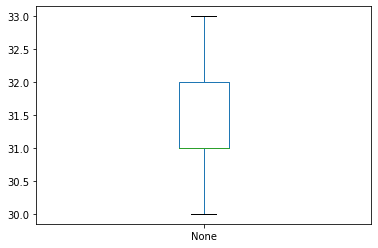

In [107]:
s.plot.box()

In [108]:
s.describe()

count     8.000000
mean     31.375000
std       0.916125
min      30.000000
25%      31.000000
50%      31.000000
75%      32.000000
max      33.000000
dtype: float64

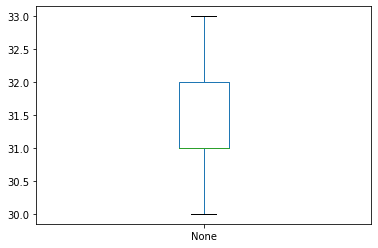

In [109]:
plot = s.plot.box()   # store the boxplot object to the "plot" variable


In [110]:
plot

<AxesSubplot:>

In [111]:
type(plot)

matplotlib.axes._subplots.AxesSubplot

In [112]:
# now that I have the plot object, I can get the image ("figure")
fig = plot.get_figure()

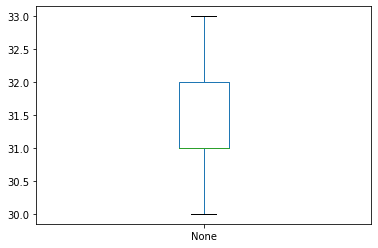

In [113]:
fig

In [114]:
# store the figure to the filesystem with "savefig"
fig.savefig('myplot.png')

In [115]:
%pwd

'/Users/reuven/Consulting/Courses/Data Science/cisco-2020-september'